In [1]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
sns.__version__

'0.13.2'

💓 1️⃣ 심혈관질환 위험요인 분석 (메인 디쉬급)

핵심 변수: HadHeartAttack, HadAngina, HadStroke, SmokerStatus, BMI, SleepHours, AgeCategory, AlcoholDrinkers, PhysicalActivities

할 수 있는 분석:

흡연·음주·수면시간에 따른 심혈관질환 발생률 비교 (barplot, heatmap)

BMI 구간별 심장질환 비율

로지스틱 회귀로 위험도 예측 (feature importance 시각화)

연령대별 위험도 곡선(lineplot)

🍽 인사이트 맛: “운동하지 않고 수면이 짧은 고BMI 흡연군은 위험률이 2배↑”

In [4]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df = df.drop(['RemovedTeeth', 'DeafOrHardOfHearing', 'HadSkinCancer', 'LastCheckupTime',  'HadKidneyDisease', 'DifficultyWalking', 'HadArthritis', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear'], axis=1)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes


In [5]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadDiabetes', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [6]:

df = df.dropna().reset_index()


In [52]:
df['HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df['HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df['HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

df['SmokerStatus']

0          비흡연
1          비흡연
2          비흡연
3          비흡연
4         과거흡연
          ... 
289291     비흡연
289292     비흡연
289293     비흡연
289294     비흡연
289295    과거흡연
Name: SmokerStatus, Length: 289296, dtype: object

## 심장질환 여부


In [8]:
# font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
# font_prop = fm.FontProperties(fname=font_path)
# font_name = font_prop.get_name() # 폰트명
# plt.rc('font', family=font_name)
# # matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# # -> 아스키코드의 마이너스 사용
# plt.rc('axes', unicode_minus=False)

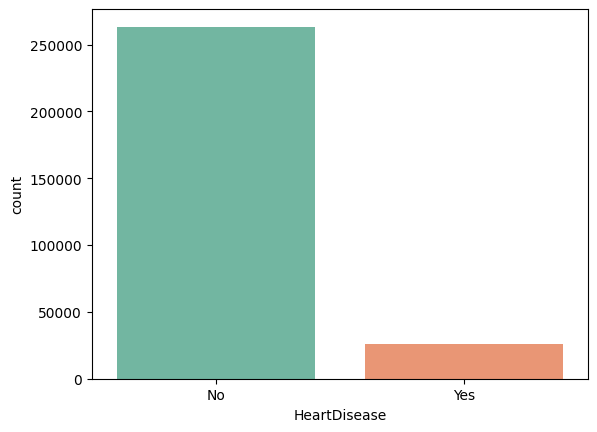

In [9]:


sns.countplot(data=df, x='HeartDisease', palette='Set2', hue='HeartDisease')



plt.show()

## 나이 그룹별 심장질환 여부

In [10]:
df['AgeCategory'].unique()

array(['Age 80 or older', 'Age 55 to 59', 'Age 40 to 44', 'Age 65 to 69',
       'Age 75 to 79', 'Age 70 to 74', 'Age 60 to 64', 'Age 50 to 54',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

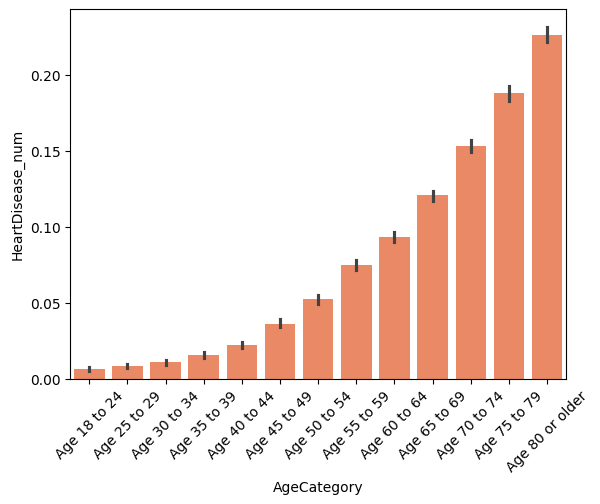

In [11]:
order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']


sns.barplot(data=df, x = 'AgeCategory', y = 'HeartDisease_num', order=order, color = 'coral')

plt.xticks(rotation = 45)

plt.show()

## 성별별 심혈관질환 비율

C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\2403526621.py:37: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing fr

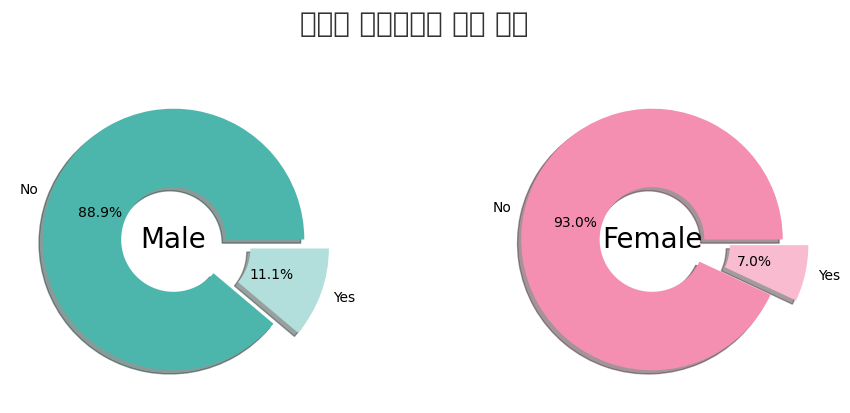

In [32]:
male_df = df[df['Sex'] == 'Male']
male_df
female_df = df[df['Sex'] == 'Female']

male_heart = male_df['HeartDisease'].value_counts()
male_heart

female_heart = female_df['HeartDisease'].value_counts()
female_heart
colors_male = ['#4DB6AC', '#B2DFDB']      # 남자: 청록색 계열
colors_female = ['#F48FB1', '#F8BBD0']    # 여자: 분홍색 계열

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
explode = [0, 0.2]
# 남성
ax[0].pie(male_heart, labels=male_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_male, shadow=True,
            explode = explode
        )
ax[0].text(0, 0, 'Male', ha='center', va = 'center', fontsize = 20)

# 여성
ax[1].pie(female_heart, labels=female_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_female, shadow=True,
            explode = explode
        )
ax[1].text(0, 0, 'Female', ha='center', va = 'center', fontsize = 20)

plt.suptitle(
    '성별별 심혈관질환 비율 비교',
    fontsize=20,
    fontweight='bold',
    color='#333333',
    y=1.02   
)

plt.tight_layout()
plt.show()




## 생활습관에 따른 심혈관질환 비율

C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kyusi\AppData\Local\Temp\ipykernel_7968\4250998393.py:16: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font

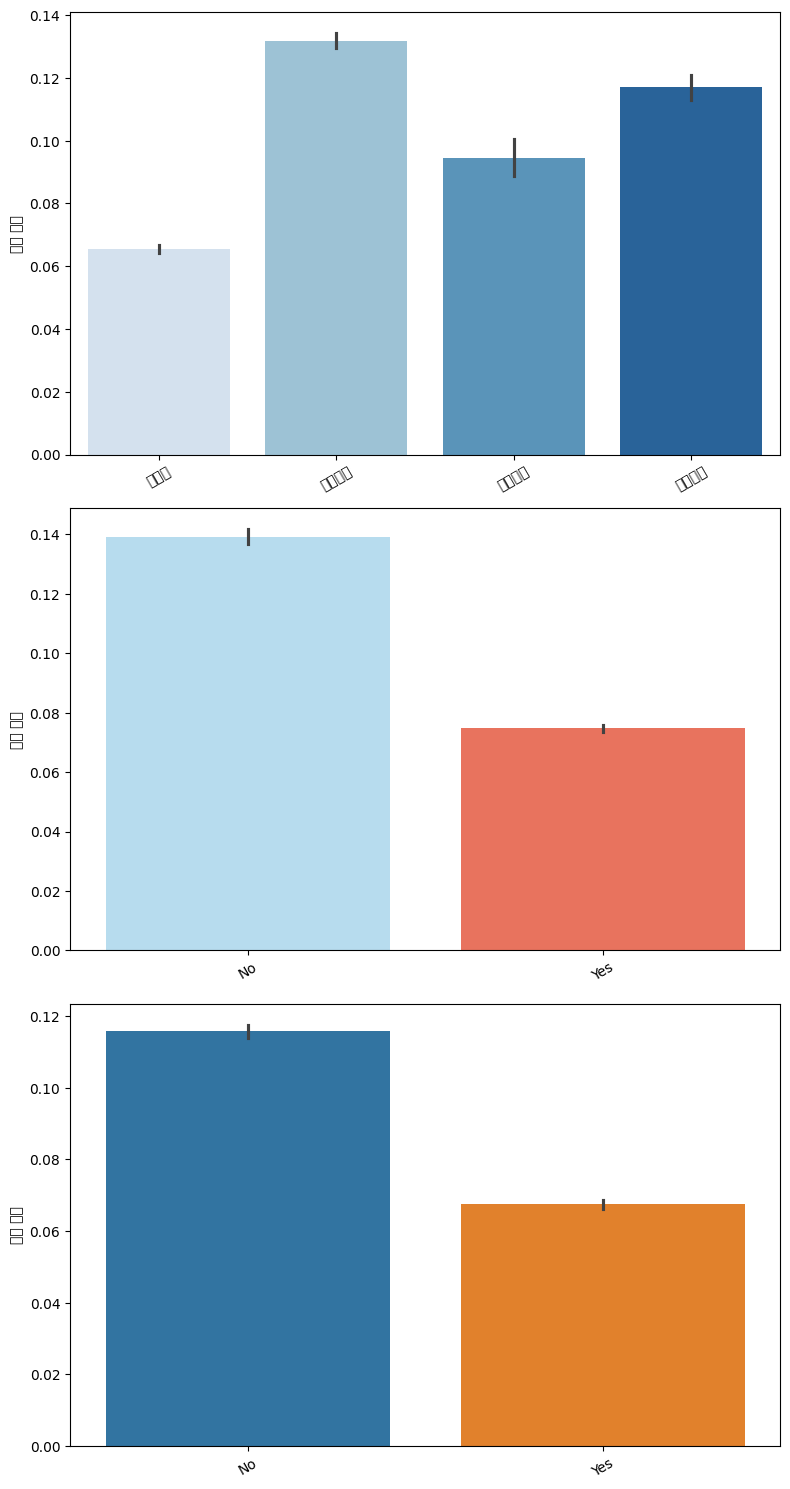

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8,15))

# 흡연여부
sns.barplot(data = df, x = 'SmokerStatus', y = 'HeartDisease_num', palette='Blues', hue='SmokerStatus', ax = ax[0])

# 운동 여부
sns.barplot(data=df, x = 'PhysicalActivities', y = 'HeartDisease_num', palette = ['#AEDFF7', '#FF6347'], hue = 'PhysicalActivities', ax = ax[1])

# 음주
sns.barplot(data = df, x = 'AlcoholDrinkers', y = 'HeartDisease_num', hue = 'AlcoholDrinkers', ax = ax[2])


plt.tight_layout()
plt.show()

In [46]:
df['SmokerStatus'].unique()

array(['Never smoked', 'Former smoker',
       'Current smoker - now smokes some days',
       'Current smoker - now smokes every day'], dtype=object)

## BMI, 수면시간에 따른 심혈관질환 여부